<a href="https://colab.research.google.com/github/hufsaim/T03108701/blob/main/notebook_2024/Lab07_SVD_of_digital_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 이번 실습에서는 Image에 대한 SVD의 예를 간단히 살펴 봅니다. Digital image는 각각의 pixel의 색을 나타내는 숫자들로 이루어진 matrix로 볼 수 있습니다. 영상데이터를 저장하고 전송함에 있어 데이터의 크기는 비용과 직결되는 굉장히 중요한 문제입니다. 우리는 문제가 되지 않는 선에서 데이터의 크기를 줄이고자 하고, 이러한 과정을 압축이라고 부릅니다. 압축과 관련하여 SVD가 어떤 식으로 활용이 될 수 있는지 살펴봅니다. (실제 영상압축에서는 SVD뿐만 아니라 다양한 접근방법이 존재합니다.)

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

## sigunlar value decomposition
- numpy package를 이용해 matrix로부터 singular value, sigular vector를 구하고, singular value decomposition을 이해하자.

In [2]:
A = np.array([[2,2],[1,-1]])
U,sig,V = np.linalg.svd(A)
print("A=\n",A)
print("singular vector matrix U = \n",U)
print("singular values=\n",sig)
print("singular value matrix =\n",np.diag(sig))
print("singular vector matrix V = \n",V)

A=
 [[ 2  2]
 [ 1 -1]]
singular vector matrix U = 
 [[-1.00000000e+00 -1.11022302e-16]
 [-1.11022302e-16  1.00000000e+00]]
singular values=
 [2.82842712 1.41421356]
singular value matrix =
 [[2.82842712 0.        ]
 [0.         1.41421356]]
singular vector matrix V = 
 [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [3]:
# A = U SIG V'
print(U@np.diag(sig)@(V))

[[ 2.  2.]
 [ 1. -1.]]


In [4]:
sig[0]*np.outer(U[0,:],V[0,:])

array([[2.00000000e+00, 2.00000000e+00],
       [2.22044605e-16, 2.22044605e-16]])

In [5]:
sig[1]*np.outer(U[1,:],V[1,:])

array([[-1.11022302e-16,  1.11022302e-16],
       [ 1.00000000e+00, -1.00000000e+00]])

In [6]:
sig[0]*np.outer(U[0,:],V[0,:]) + sig[1]*np.outer(U[1,:],V[1,:]) # singular value decomposition

array([[ 2.,  2.],
       [ 1., -1.]])

## SVD of digital image

- 실습을 위해 영상을 하나 가져오도록 합니다. 칼라영상인 경우에는 여러 개의 채널을 가지므로, 각각의 채널에 대한 추가적인 연산이 필요합니다. I.shape을 통하여 영상을 표현하는 matrix의 크기를 확인해 봅시다.

In [7]:
img = 'https://upload.wikimedia.org/wikipedia/commons/b/b2/MRI_of_Human_Brain.jpg'
I = io.imread(img, as_gray=True)
I = np.squeeze(np.array(I))
I.shape

(1534, 1433)

- 다음과 같은 코드를 실행하여 영상이 제대로 matrix로 저장이 되었는지 확인해 볼 수 있습니다.

float64


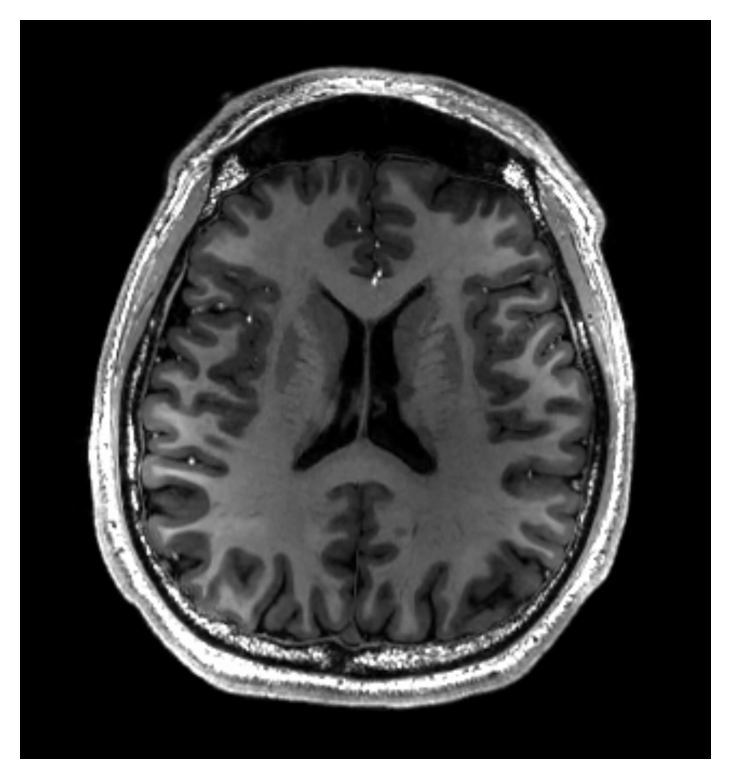

In [8]:
print(I.dtype)
plt.figure(dpi=200)
plt.imshow(I,cmap='gray')
plt.axis('off')
plt.show()

- SVD는 np.linalg.svd를 통해 행해질 수 있습니다. svd는 U, sig, V를 반환합니다.

In [9]:
U,sig,V = np.linalg.svd(I)

- 반환된 matrix들의 shape를 확인해 봅시다. sigular value로 구성되는 sig는 diagonal matrix이기 때문에 대각성분만을 vector로 반환하였습니다.

In [10]:
print(U.shape)
print(sig.shape)
print(V.shape)

(1534, 1534)
(1433,)
(1433, 1433)


- U 또는 V의 vector들(singular vector)의 length가 1인지 확인해 봅시다. 정확히 1이 되지는 못해도 거의 1에 가까움을 확인할 수 있을 것입니다.

In [11]:
print(np.linalg.norm(V[:,1]))

1.0


- sigular value는 크기 순으로 정렬되어 있습니다. 앞에서부터 10번째까지의 singular value들과 뒤에서부터 10번째까지의 singular value들을 각각 출력해봅니다.
- np.diag를 이용하여 singular value들을 diagonal matrix로 구성할 수 있습니다.

In [12]:
print(sig[:10])
print(sig[-10:])
Sig = np.diag(sig)
print(Sig.shape)

[357.6944778  129.6033424  107.61772831  99.36229672  82.75669061
  70.23949288  60.95470413  46.62711538  42.91094139  41.7292277 ]
[3.24471083e-14 3.24471083e-14 3.24471083e-14 3.24471083e-14
 3.24471083e-14 3.24471083e-14 3.24471083e-14 3.24471083e-14
 3.17564641e-14 3.11167044e-14]
(1433, 1433)


- Singular value값을 y축을 log scale로 하여 관찰해 봅니다.

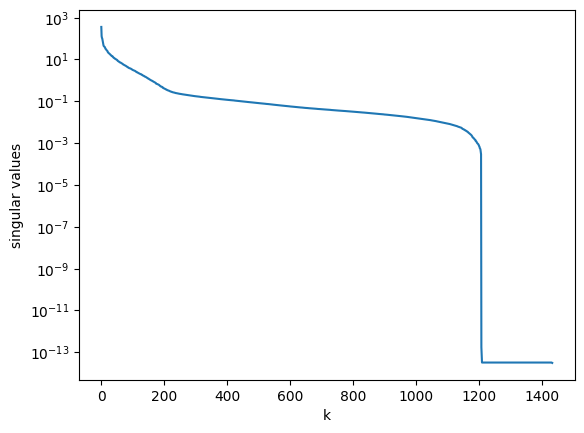

In [13]:
plt.semilogy(sig)
plt.xlabel('k')
plt.ylabel('singular values')
plt.show()

- 40번째 까지의 singluar value들을 linear scale로 하여 관찰해 봅니다.

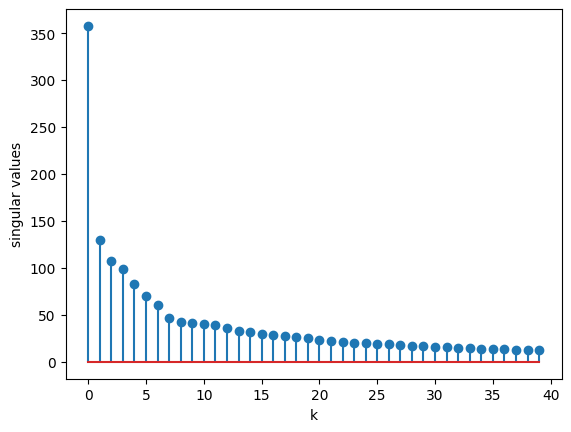

In [14]:
plt.stem(sig[:40])
plt.xlabel('k')
plt.ylabel('singular values')
plt.show()

- 특정 singular value에 해당하는 성분만을 가져와서 matrix를 구성하고, 이를 통해 나타나는 영상을 확인해보겠습니다.

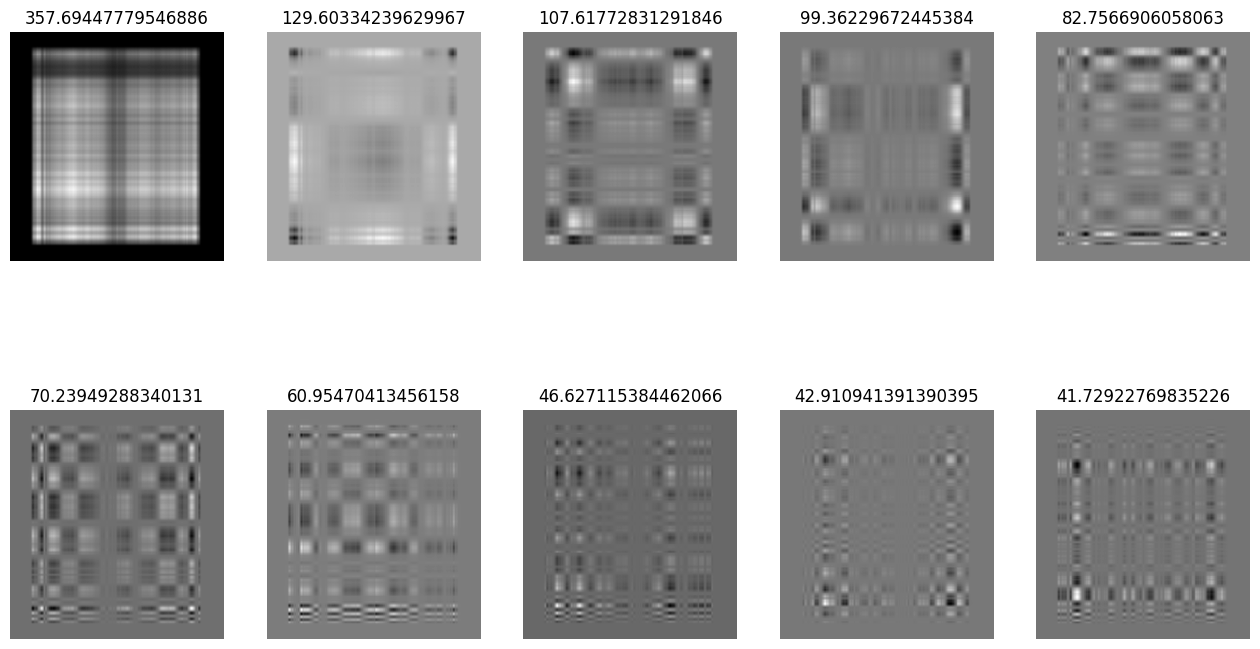

In [15]:
plt.figure(figsize=(16,9))
for n in range(10):
  Uc = U[:,n]
  sigc = sig[n]
  Vc = V[n,:]

  plt.subplot(2,5,n+1)
  plt.imshow(sigc*np.outer(Uc,Vc),cmap='gray')
  plt.axis('off')
  plt.title(sig[n])
plt.show()

(1534, 1)
(1,)
(1, 1433)


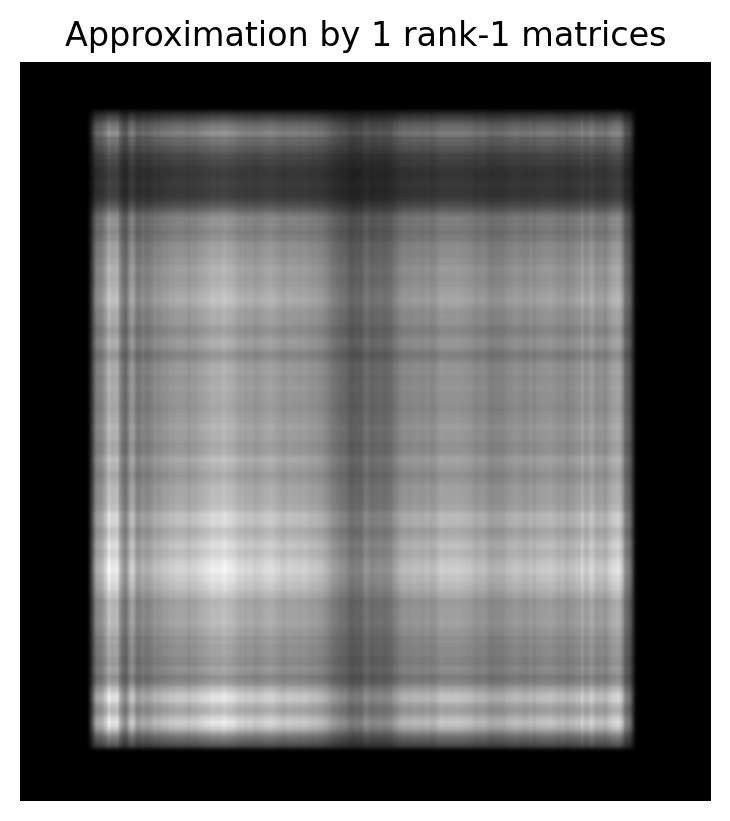

In [16]:
n=1
Uc = U[:,:n]
sigc = sig[:n]
Vc = V[:n,:]
print(Uc.shape)
print(sigc.shape)
print(Vc.shape)
plt.figure(dpi=200)
plt.imshow(np.matmul(Uc,np.matmul(np.diag(sigc),Vc)),cmap='gray')
plt.axis('off')
plt.title(f'Approximation by {n} rank-1 matrices')
plt.show()

- 10번째 성분까지 사용하여 영상을 만들어 보겠습니다.

(1534, 10)
(10,)
(10, 1433)


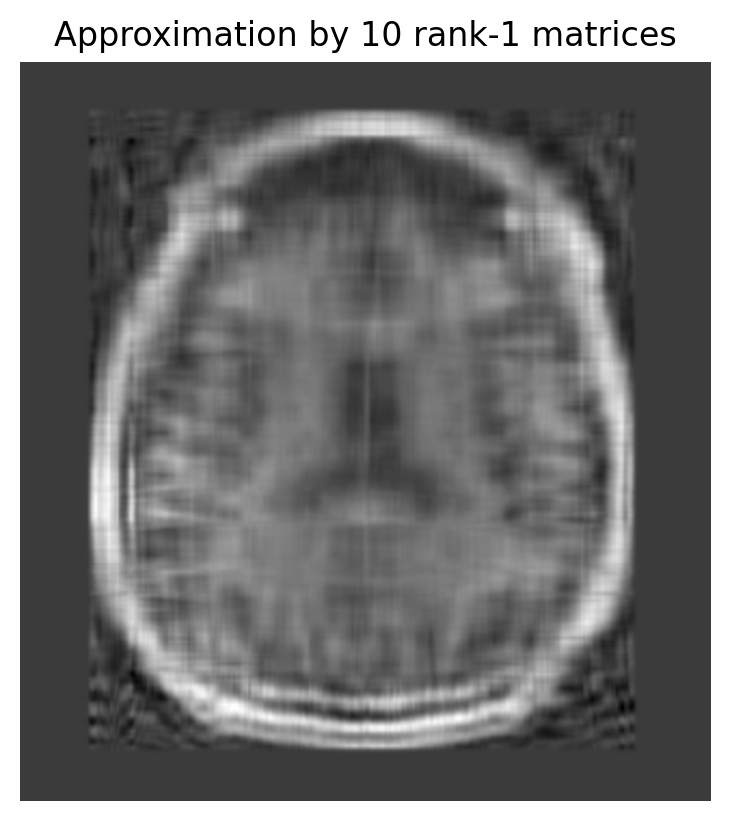

In [17]:
n=10
Uc = U[:,:n]
sigc = sig[:n]
Vc = V[:n,:]
print(Uc.shape)
print(sigc.shape)
print(Vc.shape)
plt.figure(dpi=200)
plt.imshow(np.matmul(Uc,np.matmul(np.diag(sigc),Vc)),cmap='gray')
plt.axis('off')
plt.title(f'Approximation by {n} rank-1 matrices')
plt.show()

- n을 점점 키우면서 영상을 확인하여 어느 정도 n이면 원본과 충분히 비슷한지, 그리고 그 때의 데이터를 표현하기 위해 사용된 숫자의 개수를 원본 matrix의 숫자의 개수와 비교해 봅시다.

(1534, 50)
(50,)
(50, 1433)


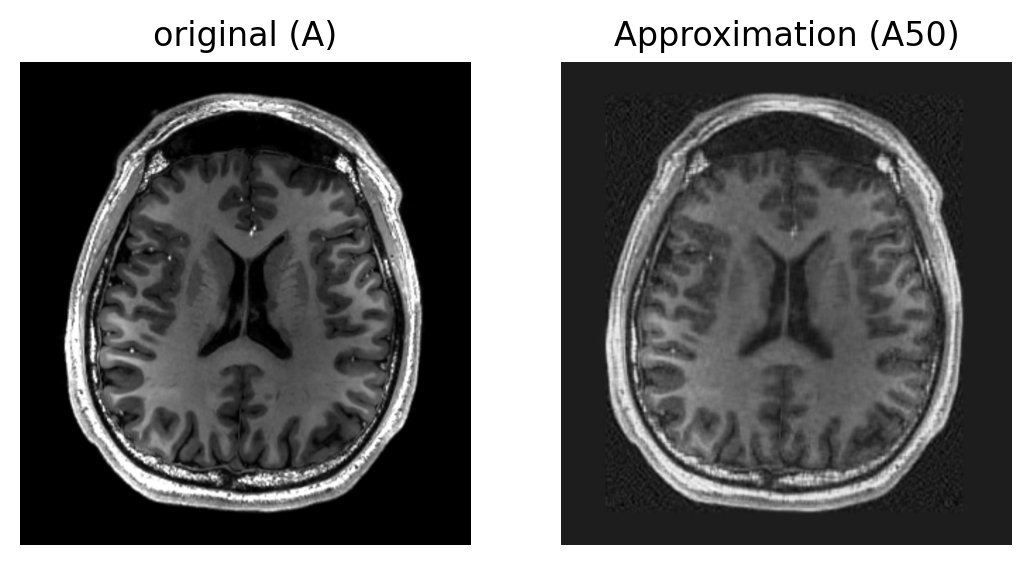

In [18]:
n=50
Uc = U[:,:n]
sigc = sig[:n]
Vc = V[:n,:]
print(Uc.shape)
print(sigc.shape)
print(Vc.shape)
plt.figure(dpi=200)
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.axis('off')
plt.title('original (A)')
plt.subplot(122)
plt.imshow(np.matmul(Uc,np.matmul(np.diag(sigc),Vc)),cmap='gray')
plt.axis('off')
plt.title(f'Approximation (A{n})')
plt.show()

(1534, 100)
(100,)
(100, 1433)


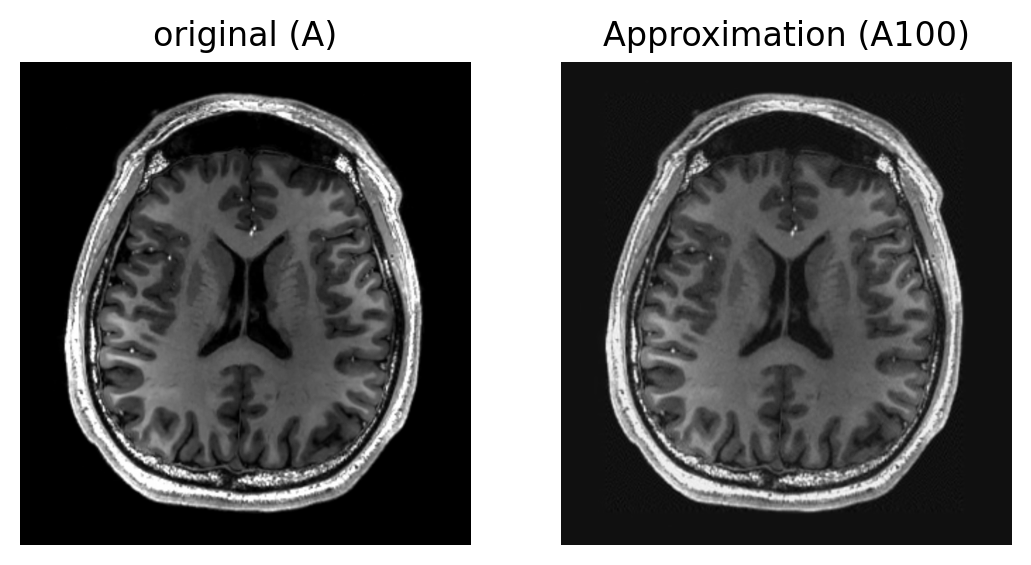

In [19]:
n=100
Uc = U[:,:n]
sigc = sig[:n]
Vc = V[:n,:]
print(Uc.shape)
print(sigc.shape)
print(Vc.shape)
plt.figure(dpi=200)
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.axis('off')
plt.title('original (A)')
plt.subplot(122)
plt.imshow(np.matmul(Uc,np.matmul(np.diag(sigc),Vc)),cmap='gray')
plt.axis('off')
plt.title(f'Approximation (A{n})')
plt.show()

(1534, 200)
(200,)
(200, 1433)


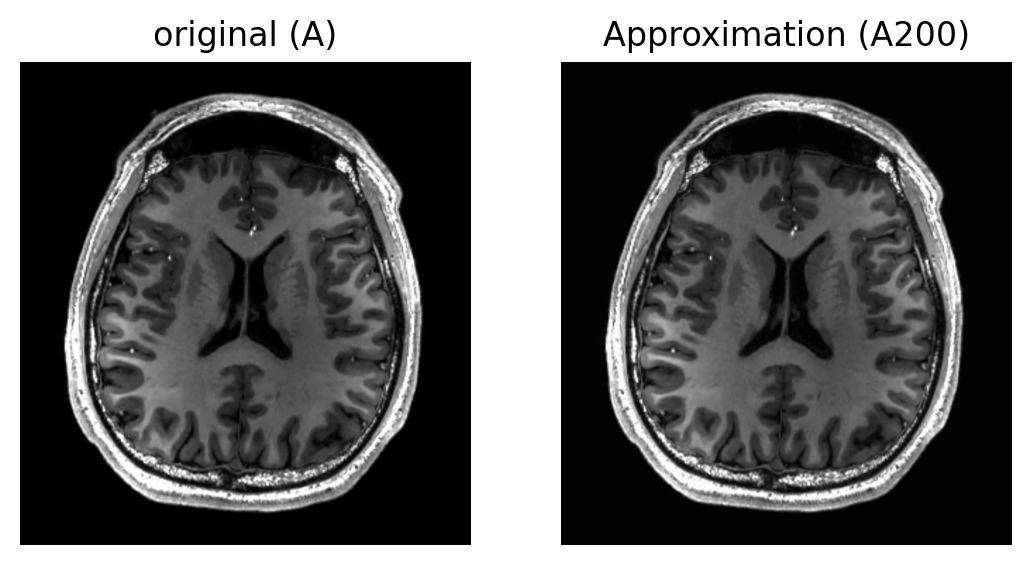

In [20]:
n=200
Uc = U[:,:n]
sigc = sig[:n]
Vc = V[:n,:]
print(Uc.shape)
print(sigc.shape)
print(Vc.shape)
plt.figure(dpi=200)
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.axis('off')
plt.title('original (A)')
plt.subplot(122)
plt.imshow(np.matmul(Uc,np.matmul(np.diag(sigc),Vc)),cmap='gray')
plt.axis('off')
plt.title(f'Approximation (A{n})')
plt.show()